# Material Project tool to access the database

In [1]:
from pymatgen import MPRester

/Users/bgadagun/repos/pymatgen/pymatgen/__init__.py:34: UserWarning: With effect from pmg 5.0, all pymatgen settings are prefixed with a "PMG_". E.g., "PMG_VASP_PSP_DIR" instead of "VASP_PSP_DIR".
  warnings.warn('With effect from pmg 5.0, all pymatgen settings are'


# Compatibility adjustments so that DFT and DFT+U calculations can be compared
Also accounts for some of the gas corrections due to DFT error

In [3]:
from pymatgen.entries.compatibility import MaterialsProjectCompatibility

In [4]:
%matplotlib inline

# API Key obtained from Materials Project. REGISTER in materialsproject.org to get this key.
Key can be stored in the bash_profile

In [5]:
m = MPRester(api_key="Enter your MP API Key if you haven't stored it in bash_profile")

In [6]:
# Get entries in the chemical space
entries = m.get_entries_in_chemsys(["Li", "O"])

In [7]:
# Make sure compatibility requirements are met
compat = MaterialsProjectCompatibility()
entries = compat.process_entries(entries)

In [8]:
# Create a phase diagram

from pymatgen.phasediagram.maker import PhaseDiagram
from pymatgen.phasediagram.analyzer import PDAnalyzer

pd = PhaseDiagram(entries)

In [9]:
# Plot the phase diagram
from pymatgen.phasediagram.plotter import PDPlotter
plt = PDPlotter(pd, show_unstable=False)

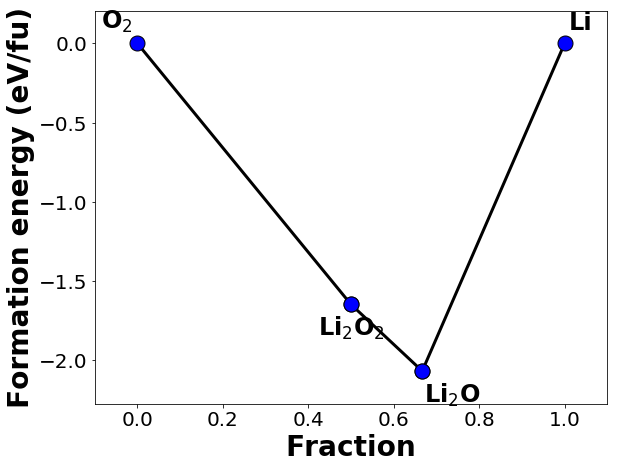

In [10]:
plt.show()

# Analyze the phase diagram

In [11]:
a = PDAnalyzer(pd=pd)

In [16]:
for entry in pd.all_entries:
    decomp, ehull = a.get_decomp_and_e_above_hull(entry)
    dp = "Decomposition products"
    dp += ": "
    for k, v in decomp.items():
        dp += k.composition.formula + ", "
    print(entry.composition.reduced_formula, " Ehull: ", ehull, " eV/atom", " ", dp)

O2  Ehull:  0.02377676375  eV/atom   Decomposition products: O8, 
O2  Ehull:  0  eV/atom   Decomposition products: O8, 
O2  Ehull:  0.00541793375  eV/atom   Decomposition products: O8, 
O2  Ehull:  0.01336604875  eV/atom   Decomposition products: O8, 
O2  Ehull:  0.11235531875  eV/atom   Decomposition products: O8, 
O2  Ehull:  0.414822825  eV/atom   Decomposition products: O8, 
O2  Ehull:  0.007881895  eV/atom   Decomposition products: O8, 
Li  Ehull:  0.00329158  eV/atom   Decomposition products: Li1, 
Li  Ehull:  0  eV/atom   Decomposition products: Li1, 
Li  Ehull:  0.00338554  eV/atom   Decomposition products: Li1, 
Li  Ehull:  0.00305563  eV/atom   Decomposition products: Li1, 
Li  Ehull:  0.00280463  eV/atom   Decomposition products: Li1, 
Li  Ehull:  0.2816946775  eV/atom   Decomposition products: Li1, 
LiO3  Ehull:  0.202419805625  eV/atom   Decomposition products: Li4 O4, O8, 
Li2O  Ehull:  0  eV/atom   Decomposition products: Li2 O1, 
Li2O  Ehull:  0.0854445916667  eV/atom  